**Project :**

The retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal  budget. The department wants to build a model that will help identify the potential customers who have higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.
The dataset contains 5000 customer’s data.
The case is The Bank has  customer’s data with various information and details of the customers. The management built a new product- Personal Loan, and ran a small campaign towards selling the New Product to their clients. After some time, 9% of customers have Personal Loan from The Bank. *italicized text*

**The goal is :-**

To sell more Personal Loan products to Bank customers.

•	To devise campaigns to better target marketing to increase the success ratio with a minimum budget.

•	To identify the potential customers who have a higher probability of purchasing the loan 
*italicized text*

***1. Importing the libraries***

In [ ]:
#importing libraries
import pandas as pd                             #used to access and use the dataset
import numpy as np                              #used to do array operations
import seaborn as sns                           #used to plot heatmap graph which is used to see result accuracy in graphical manner
import matplotlib.pyplot as plt                 #used to plot graphs and view them
%matplotlib inline                              
pd.options.mode.chained_assignment=None         #statement to remove the warning

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


***1.1 Uploading the dataset***

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling.xlsx


***1.2 Importing the libraries for accessing information from the dataset***

In [ ]:
import io
!pip install -q xlrd
#ds =pd.read_excel(io.BytesIO(ulpoaded['Bank_Personal_Loan_Modelling.xlsx']))
ds=pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheet_name='Data')

In [ ]:
#printing the basic info about dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


*From the above information we know that we have 5000 entries in each of the column so let's start*

*Now let's have a look at our data elements*

In [ ]:
#printing the top 11 values from the dataset
ds.head(11)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


There are 12 columns.
 The aim is to construct a model that can identify potential customers who have a higher probability of purchasing loan.        
**Age**		            	Customer’s age

**Experience**   	    	No. of years of professional experience

**Income**			        Annual income of the customers

**ZIPCode**	          	Home Address ZIP Code

**Family**		     	Family size of the customer 

**CCAvg**	      	Average spending on credit cards per month

**Education**	    	Education level.  1:Undergraduate 2:Graduate , 3:Advanced/    Professional 

**Mortgage**	    	Value of house mortgage if any

**Securities Account**	Does the customer have a securities account with the bank?

**CD Account**		Does the customer have a certificate of deposit (CD) Account with the bank?

**Online**			Does the customer uses customer banking facilities?

**CreditCard**		Does the customer uses a credit card issued by Universal Bank?

**Personal Loan**		Did the customer accepted the personal loan offered in the last campaign? 


In [ ]:
#printing the bottom 8 values from the dataset
ds.tail(8)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4992,4993,30,5,13,90037,4,0.500000,3,0,0,0,0,0,0
4993,4994,45,21,218,91801,2,6.666667,1,0,0,0,0,1,0
4994,4995,64,40,75,94588,3,2.000000,3,0,0,0,0,1,0
4995,4996,29,3,40,92697,1,1.900000,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.400000,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.300000,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.500000,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.800000,1,0,0,0,0,1,1


*Now we have seen some starting and ending data which tells us how our data looks like. Let's check how many null values are there in the dataset provided?*

In [ ]:
ds.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

*We get to know that there are no null values*

In [ ]:
#Viewing Statistical information regarding the data, ex:Mean, etc.
ds.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
#Viewing the number of rows and columns for verification.
print(ds.shape)

(5000, 14)


*Here we notice that min value of age is -3 which isn't possible  and also experience column has some impossible values. From this we know that the dataset contains some faulty values which needs to be corrected. Now we will find correlation between age and experience  *

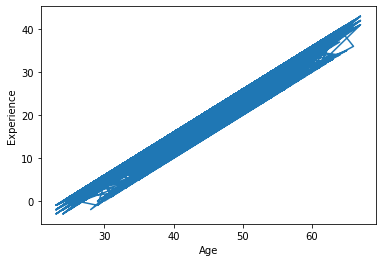

In [ ]:
#Extracting Experience and Age and storing to variables
age = ds['Age']
experience = ds['Experience']

#Plotting Line graph between the two.
plt.plot(age,experience)
plt.xlabel('Age')
plt.ylabel('Experience')
plt.show()

**1.3 Correlation**

It is clearly visible that both are correlated. So, now let's check the degree of Correlation. *italicized text*

In [ ]:
#value of correlation
correlation=experience.corr(age)
correlation

0.9942148569683321

*So, it is clearly indicated that both are highly correlated. So, we can remove the experience column as it will not make any difference until age is there. Moreover, it had faulty data. ID also needs to be dropped but let's retain it till graph plotting, afterwards, before model creation, we will remove it as well.*

**2. DATA CLEANING**


*Dropping the ID & Experience column and checking how our new dataset look like! We are removing Id column as every user has unique ID which has nothing to do in loan process .*

In [ ]:
ds=ds.drop(['ID','Experience'],axis=1)
ds.head(10)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
5,37,29,92121,4,0.4,2,155,0,0,0,1,0
6,53,72,91711,2,1.5,2,0,0,0,0,1,0
7,50,22,93943,1,0.3,3,0,0,0,0,0,1
8,35,81,90089,3,0.6,2,104,0,0,0,1,0
9,34,180,93023,1,8.9,3,0,1,0,0,0,0


In [ ]:
#just getting a view of updated dataset
ds

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0


***3.  EDA***

**3.1** Finding number of unique in each column

In [ ]:
ds.nunique()

Age                    45
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

*It will not be meaningful to view the value counts of unique values of Income, CCAvg, Mortgage and Zipcode as they have many unique values as clearly visible but we will be seeing their graphical distribution after all other fields*

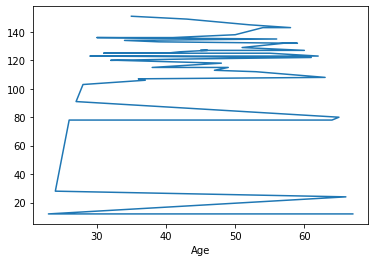

In [ ]:
plt.plot(ds['Age'].value_counts())
plt.xlabel('Age')
plt.show()

In [ ]:
#getting value count of Family
ds['Family'].value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

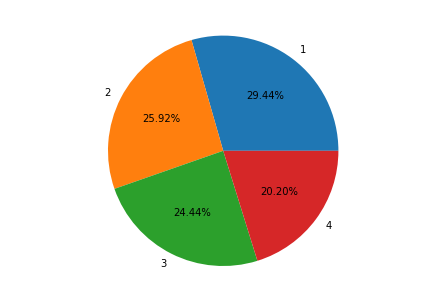

In [ ]:
#Pie chart Representation of Family unique values and counts
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['1','2','3','4']
ax.pie(ds['Family'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

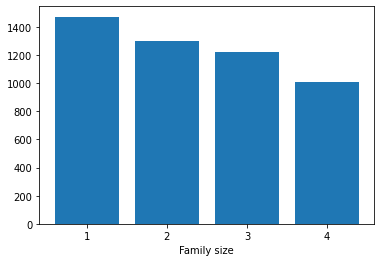

In [ ]:
#Viewing this distribution in Bar Graph
plt.bar(label, ds['Family'].value_counts())
plt.xlabel('Family size')
plt.show()

In [ ]:
#Now seeing unique value counts of Education in which 1: Undergraduate, 2: Graduate, 3: Advanced/Professional
ds['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

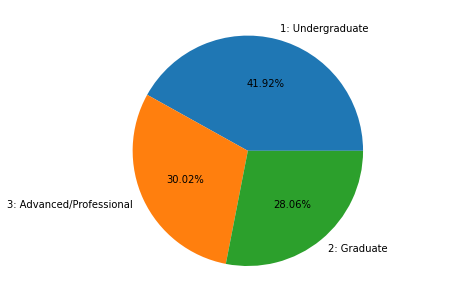

In [ ]:
#Now seeing the Pie Chart of this distributuion
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['1: Undergraduate','3: Advanced/Professional','2: Graduate']
ax.pie(ds['Education'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

*From here we conclude that maximum number of customers are undergraduates.*

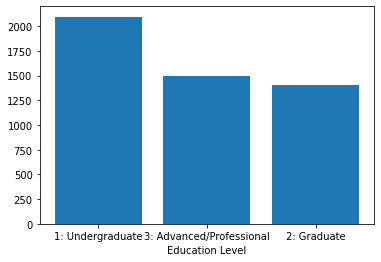

In [ ]:
#Viewing the bar graph representation of this distribution
plt.bar(label, ds['Education'].value_counts())
plt.xlabel('Education Level')
plt.show()

In [ ]:
#Viewing Value Count of Previous Loan Taken, 0: No, 1: Yes
ds['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

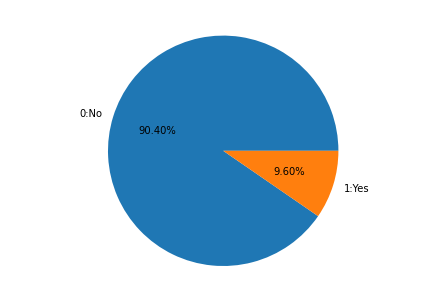

In [ ]:
#Viewing this distribution in Pie Chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['0:No','1:Yes']
ax.pie(ds['Personal Loan'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

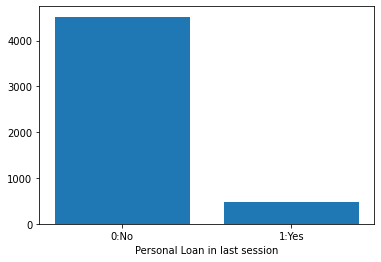

In [ ]:
#Viewing this distribution in bar graph
plt.bar(label, ds['Personal Loan'].value_counts())
plt.xlabel('Personal Loan in last session')
plt.show()

In [ ]:
#Viewing the distribution of Whether the customer has a security account with the bank, 1:yes, 0:no
ds['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

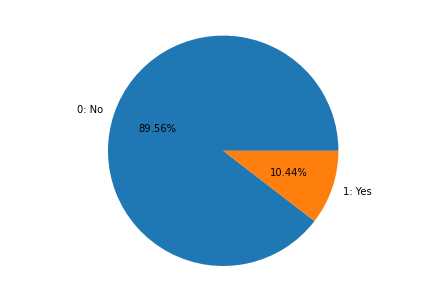

In [ ]:
#Viewing Pie Chart of this distribution
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['0: No', '1: Yes']
ax.pie(ds['Securities Account'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

*Only 10.44% of our customers have security accounts.*

In [ ]:
#Viewing the distribution of whether the customer has a CD Account with the bank, 0:No, 1:Yes
ds['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

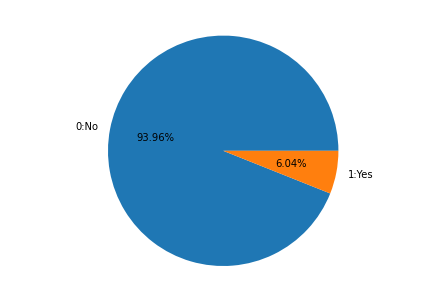

In [ ]:
#Viewing the pie chart of this distribution
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['0:No','1:Yes']
ax.pie(ds['CD Account'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

*Only 6.04% customers have certificate of deposit accounts.*

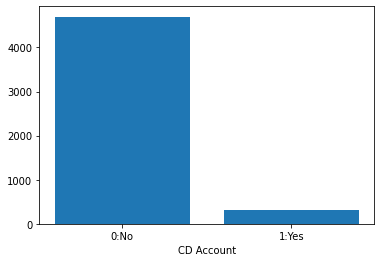

In [ ]:
#Viewing the Bar Chart of this distribution
plt.bar(label,ds['CD Account'].value_counts())
plt.xlabel('CD Account')
plt.show()

In [ ]:
#Viewing the distribution of whether the customer uses online banking, 0:no, 1:yes
ds['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

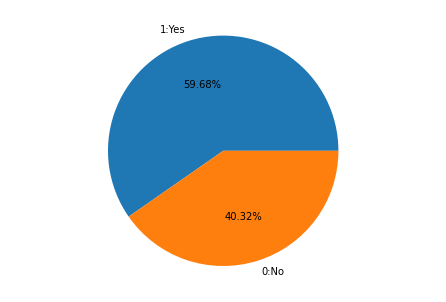

In [ ]:
#Viewing the Pie Chart Representation of this data.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['1:Yes','0:No']
ax.pie(ds['Online'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

*So, majority of our customers i.e., 59.68% use online facilities*

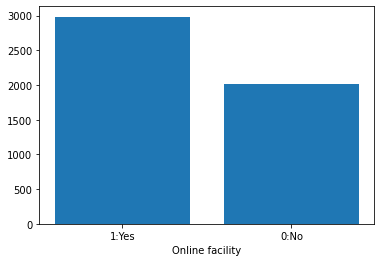

In [ ]:
#Viewing the bar chart representation of this data
plt.bar(label, ds['Online'].value_counts())
plt.xlabel('Online facility')
plt.show()

In [ ]:
#Viewing the distribution whether a person uses a Credit Card by Universal Bank, 0:No, 1:Yes
ds['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

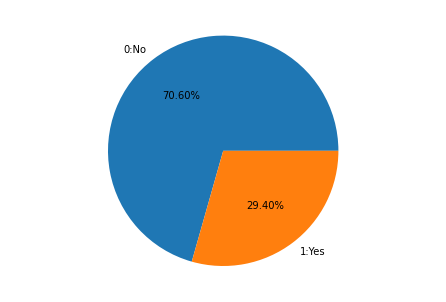

In [ ]:
#Viewing the Pie Chart Representation of this data.
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
label = ['0:No','1:Yes']
ax.pie(ds['CreditCard'].value_counts(),labels=label,autopct='%1.2f%%')
plt.show()

*So, only 29.4% users have creditcard issued by Universal Bank*

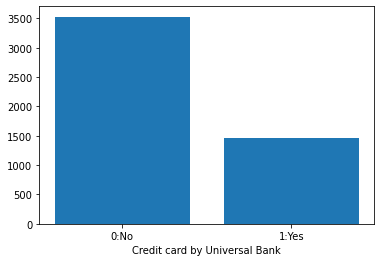

In [ ]:
#Viewing Bar Chart Representation of this data
plt.bar(label, ds['CreditCard'].value_counts())
plt.xlabel('Credit card by Universal Bank')
plt.show()

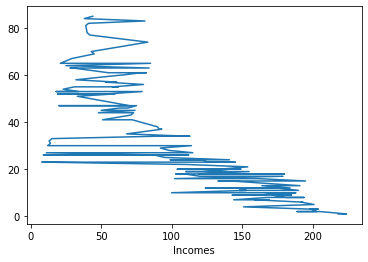

In [ ]:
#Viewing the distribution related to Income through Graph
plt.plot(ds['Income'].value_counts())
plt.xlabel('Incomes')
plt.show()

*So, it is visible that as income increases, number of customers decreases.*

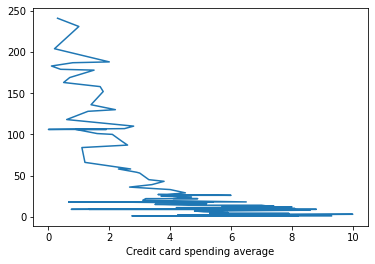

In [ ]:
#Viewing the distribution related to Average Credit Card Spending per Month
plt.plot(ds['CCAvg'].value_counts())
plt.xlabel('Credit card spending average')
plt.show()

*So, many users have low credit card spending average per month.*

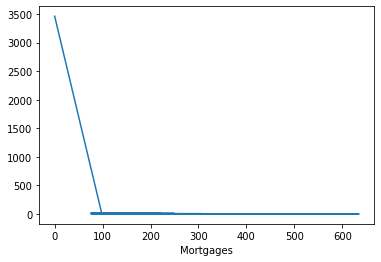

In [ ]:
#Viewing the distribution of Mortgage 
plt.plot(ds['Mortgage'].value_counts())
plt.xlabel('Mortgages')
plt.show()

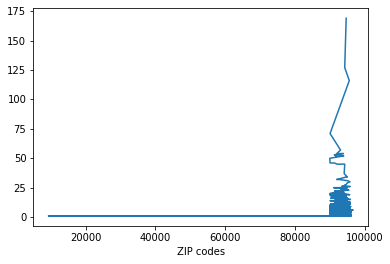

In [ ]:
#Viewing the distribution of Zipcodes
plt.plot(ds['ZIP Code'].value_counts())
plt.xlabel('ZIP codes')
plt.show()

In [ ]:
#dropping the zipcode column due to unnecessary information and also in large amount
ds.drop('ZIP Code',axis=1)

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0,0,0,1,0
4996,30,15,4,0.4,1,85,0,0,0,1,0
4997,63,24,2,0.3,3,0,0,0,0,0,0
4998,65,49,3,0.5,2,0,0,0,0,1,0


**3.2 ZERO MORTGAGE**

In [ ]:
y_mor = 0
for x_mor in ds['Mortgage']:
  if x_mor == 0:
    y_mor+=1
print(y_mor)

3462


*So, 3462 customers have zero mortgage.*

*Now, let us see number of users with zero credit card spending.*

***3.3 ZERO CREDIT CARD SPENDING***

In [ ]:
(ds.CCAvg==0).sum()         #no. of people with 0 credit card spending per month

106

*So, 106 customers have zero credit card spending average per month.*

**3.4 Value counts of all categorical columns.**

In [ ]:
#no. of people with zero mortage
(ds.Mortgage==0).sum()

3462

In [ ]:
#no. of people with 0 credit card spending per month
(ds.CCAvg==0).sum()

106

In [ ]:
#family value count
ds.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
#education value count
ds.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [ ]:
#security account value count
ds['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
#value count of CD Account
ds['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
#value count of credit card
ds['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
#value of online i.e. 1 or 0
ds.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

**3.4(a) UNIVARIATE ANALYSIS**

Plotting various graphs

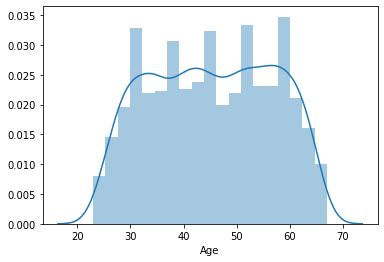

In [ ]:
## 1. Univariate Analysis
##Age seems to have symmetric distribution
sns.distplot(ds.Age);

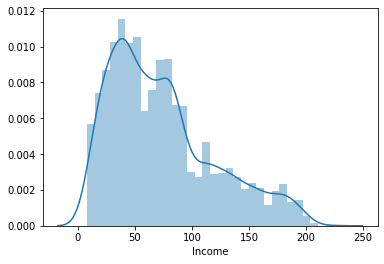

In [ ]:
#income is right skewed distribution
sns.distplot(ds.Income);

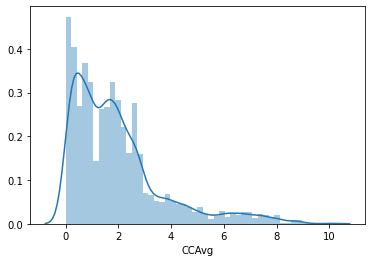

In [ ]:
sns.distplot(ds.CCAvg);

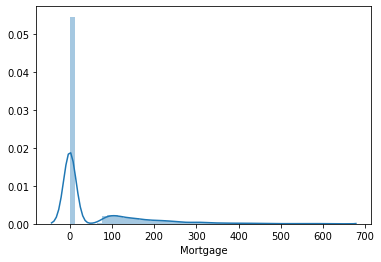

In [ ]:
#Mortgage column seems to be  highly skewed
sns.distplot(ds.Mortgage);

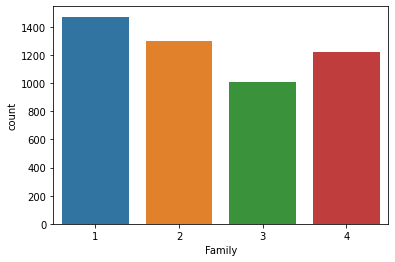

In [ ]:
sns.countplot(ds.Family);

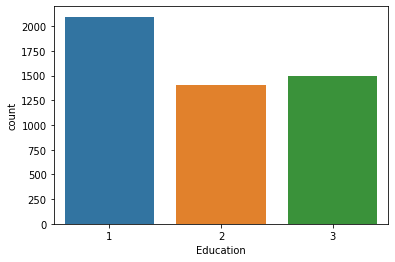

In [ ]:
sns.countplot(ds.Education);

***3.4 (b) BIVARIATE ANALYSIS***

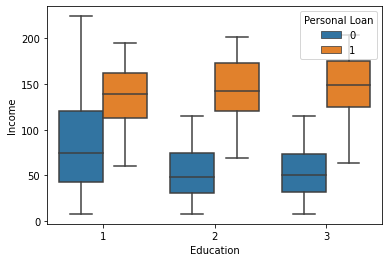

In [ ]:
## It seems the customers who has more income is granted loan access each education level
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=ds);

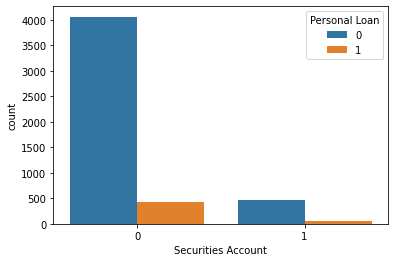

In [ ]:
## Majority of people having securities account don't have personal account
sns.countplot(x='Securities Account',data=ds,hue='Personal Loan');

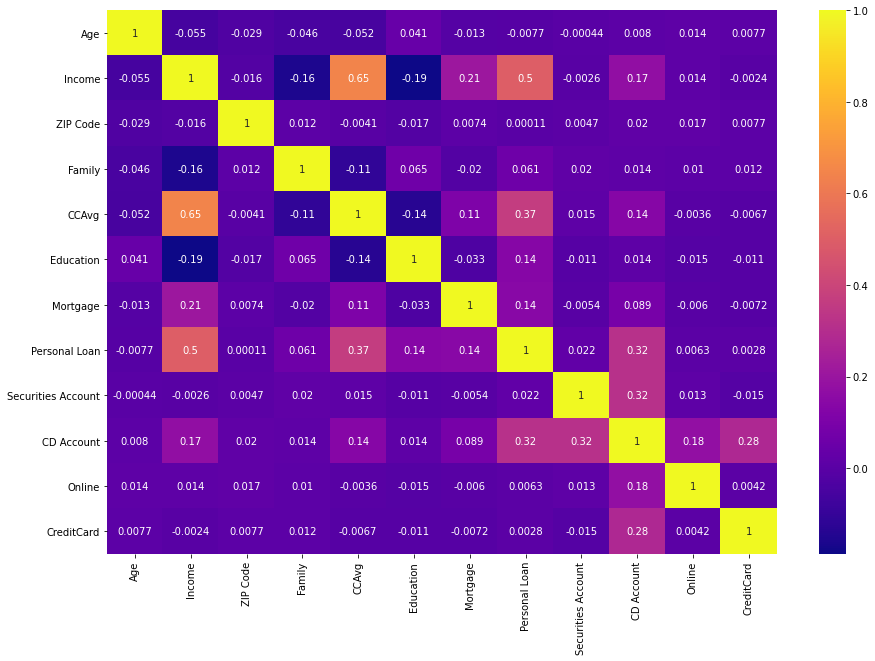

In [ ]:
## after dropping experience column earlier doesn't seem to be significant correlation b/w other variables except
#credit card average and income
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(ds.corr(),cmap='plasma',annot=True);

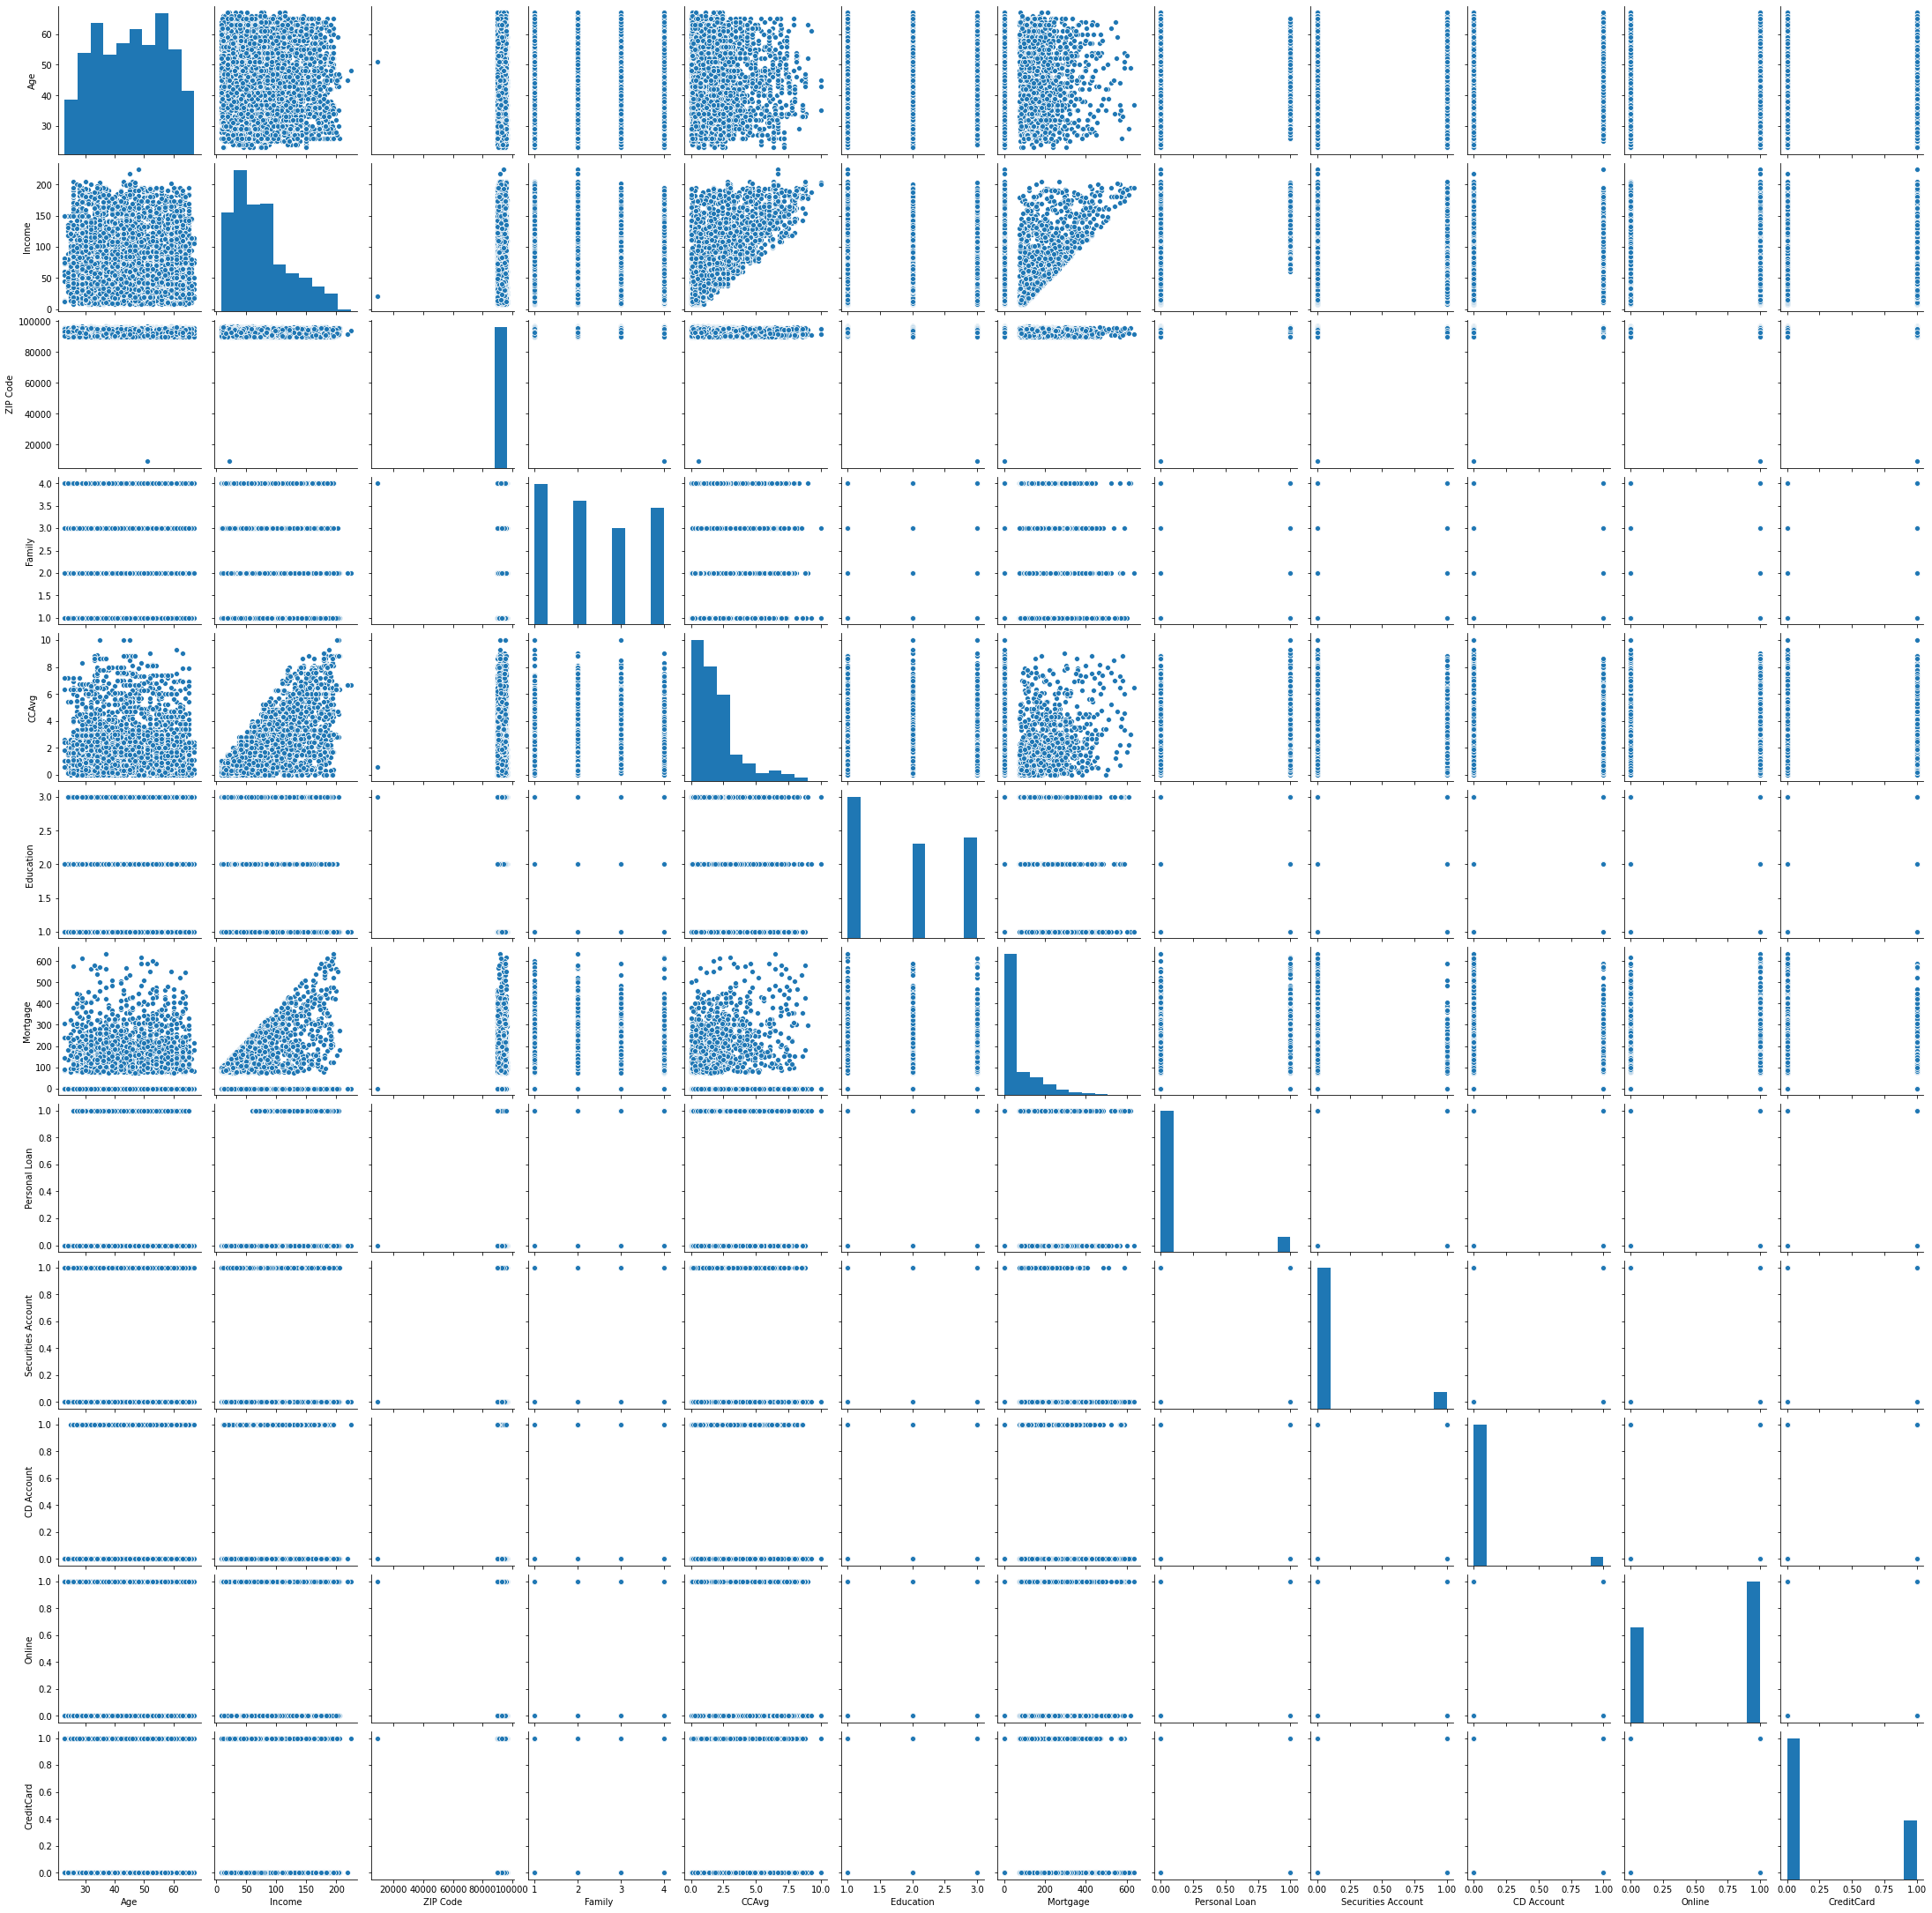

In [ ]:
sns.pairplot(ds)

In [ ]:
data_X=ds.loc[:,ds.columns!="Personal Loan"]
data_Y=ds[["Personal Loan"]]

**4. Transformation Of Featured Variables**

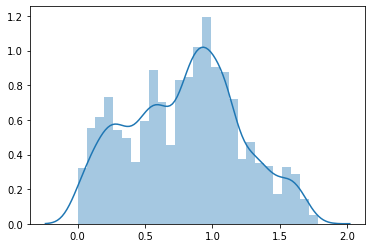

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson",standardize=False)
pt.fit(data_X["CCAvg"].values.reshape(-1,1))
temp=pt.transform(data_X["CCAvg"].values.reshape(-1,1))
sns.distplot(temp);

In [ ]:
data_X["Mortgage_Int"]=pd.cut(data_X["Mortgage"],
                              bins=[0,100,200,300,400,500,600,700],
                              labels=[0,1,2,3,4,5,6],
                              include_lowest=True)
data_X.drop("Mortgage",axis=1,inplace=True)

In [ ]:
data_X.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,25,49,91107,4,1.6,1,1,0,0,0,0
1,45,34,90089,3,1.5,1,1,0,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,1,0


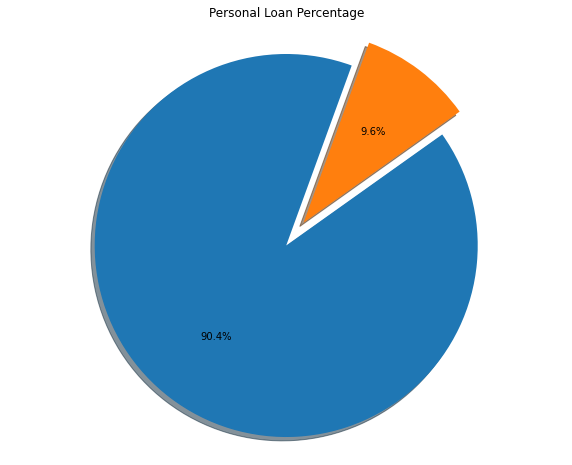

In [ ]:
##Univariate Analysis
## 9.6% of all applicants get approved for personal loan
tempDF=pd.DataFrame(ds["Personal Loan"].value_counts()).reset_index()
tempDF.columns=["Labels","Personal Loan"]
fig1,ax1=plt.subplots(figsize=(10,8))
explode=(0,0.15)
ax1.pie(tempDF["Personal Loan"],explode=explode,autopct='%1.1f%%',
        shadow=True,startangle=70)
ax1.axis('equal') #Equal aspect ratio ensures that pie is drawn as a circle
plt.title("Personal Loan Percentage")
plt.show()

**5. Normalising and Splitting of data**

In [ ]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y=train_test_split(data_X,data_Y,test_size=0.3,stratify=data_Y,random_state=0)

In [ ]:
train_X.reset_index(drop=True,inplace=True);
test_X.reset_index(drop=True,inplace=True);
train_Y.reset_index(drop=True,inplace=True);
test_Y.reset_index(drop=True,inplace=True);

In [ ]:
train_X.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard,Mortgage_Int
0,51,24,94301,3,0.4,1,0,0,1,1,0
1,64,35,90266,1,1.5,2,1,0,0,0,0
2,52,31,94923,4,1.8,1,0,0,1,1,0
3,32,20,93106,1,0.5,3,0,0,1,0,1
4,62,54,91320,1,0.8,1,1,0,0,1,0


***6. LOGISTIC REGRESSION MODEL***

In [ ]:
from sklearn.preprocessing import StandardScaler
for ind,column in enumerate(train_X.columns):
  scaler=StandardScaler()

  #fit to train data
  scaler.fit(train_X[[column]])

  #transform train data
  np_array=scaler.transform(train_X[[column]])
  train_X.loc[:,column]=pd.Series(np_array.flatten())

  #transform test data
  np_array=scaler.transform(test_X[[column]])
  test_X.loc[:,column]=pd.Series(np_array.flatten())

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
# convert dataframes to numpy arrays
np_train_X=train_X.values
np_train_Y=train_Y.values
np_test_X=test_X.values
np_test_Y=test_Y.values

In [ ]:
#Learners
cls_1=LogisticRegression(random_state=0)
cls_2=DecisionTreeClassifier(random_state=0,max_depth=8)
cls_3=RandomForestClassifier(random_state=0,n_estimators=500,max_depth=8)

#fit cls_1 on train_x and predict on test_X
cls_1.fit(np_train_X,np_train_Y.ravel())
pred_1_test_X=cls_1.predict(np_test_X)
pred_1_train_X=cls_1.predict(np_train_X)
acc_1_train_X=accuracy_score(np_train_Y,pred_1_train_X)
acc_1_test_X=accuracy_score(np_test_Y,pred_1_test_X)
print("Base learner 1 accuracy on np_train_X: {:.4f} ".format(acc_1_train_X))
print("Base learner 1 accuracy on np_test_X: {:.4f} ".format(acc_1_test_X))

#fit cls_2 on train_x and predict on test_X
cls_2.fit(np_train_X,np_train_Y.ravel())
pred_2_test_X=cls_2.predict(np_test_X)
pred_2_train_X=cls_2.predict(np_train_X)
acc_2_train_X=accuracy_score(np_train_Y,pred_2_train_X)
acc_2_test_X=accuracy_score(np_test_Y,pred_2_test_X)
print("Base learner 2 accuracy on np_train_X: {:.4f} ".format(acc_2_train_X))
print("Base learner 2 accuracy on np_test_X: {:.4f} ".format(acc_2_test_X))

#fit cls_3 on train_x and predict on test_X
cls_3.fit(np_train_X,np_train_Y.ravel())
pred_3_test_X=cls_3.predict(np_test_X)
pred_3_train_X=cls_3.predict(np_train_X)
acc_3_train_X=accuracy_score(np_train_Y,pred_3_train_X)
acc_3_test_X=accuracy_score(np_test_Y,pred_3_test_X)
print("Base learner 3 accuracy on np_train_X: {:.4f} ".format(acc_3_train_X))
print("Base learner 3 accuracy on np_test_X: {:.4f} ".format(acc_3_test_X))

Base learner 1 accuracy on np_train_X: 0.9520 
Base learner 1 accuracy on np_test_X: 0.9513 
Base learner 2 accuracy on np_train_X: 0.9960 
Base learner 2 accuracy on np_test_X: 0.9800 
Base learner 3 accuracy on np_train_X: 0.9949 
Base learner 3 accuracy on np_test_X: 0.9880 


In [ ]:
##function to get confusion matrix in a proper format
def draw_cm( actual, predicted):
  cm=confusion_matrix(actual,predicted)
  sns.heatmap(cm,annot=True, fmt='.2f', xticklabels=[0,1], yticklabels=[0,1])
  plt.ylabel('Observed')
  plt.xlabel('Predicted')
  plt.show()

In [ ]:
np_test_Y.shape

(1500, 1)

**7. Metrics related for evaluating the Model Performance**

**Confusion Matrix**

*To check whether our data is overfitting or not we will be printing both test & training data.*

**MODEL 1** **(Logistic)**

Confusion Matrix


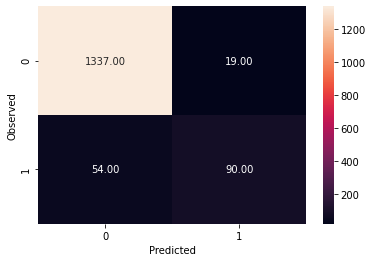

None


In [ ]:
print('Confusion Matrix')
print(draw_cm(np_test_Y,pred_1_test_X.reshape(-1,1)))

In [ ]:
print("Recall:",recall_score(np_test_Y,pred_1_test_X))
print()
print("Precision:",precision_score(np_test_Y,pred_1_test_X))
print()
print("F1 Score:",f1_score(np_test_Y,pred_1_test_X))
print()
print("Roc Auc Score:",roc_auc_score(np_test_Y,pred_1_test_X))

Recall: 0.625

Precision: 0.8256880733944955

F1 Score: 0.7114624505928855

Roc Auc Score: 0.8054941002949852


**MODEL 2**

Confusion Matrix


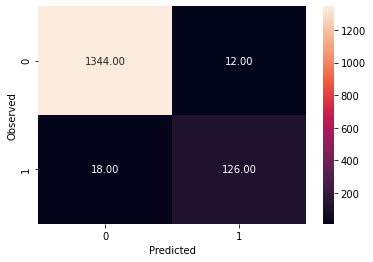

None


In [ ]:
print('Confusion Matrix')
print(draw_cm(np_test_Y,pred_2_test_X))

In [ ]:
print("Recall:",recall_score(np_test_Y,pred_2_test_X))
print()
print("Precision:",precision_score(np_test_Y,pred_2_test_X))
print()
print("F1 Score:",f1_score(np_test_Y,pred_2_test_X))
print()
print("Roc Auc Score:",roc_auc_score(np_test_Y,pred_2_test_X))

Recall: 0.875

Precision: 0.9130434782608695

F1 Score: 0.8936170212765957

Roc Auc Score: 0.933075221238938


**MODEL 3**  **(Random Forest)**

Confusion Matrix


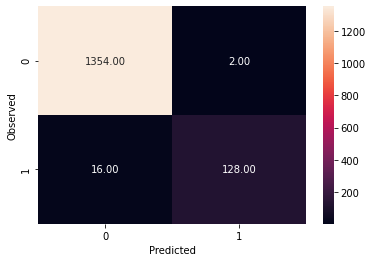

None


In [ ]:
print('Confusion Matrix')
print(draw_cm(np_test_Y,pred_3_test_X))

In [ ]:
print("Recall:",recall_score(np_test_Y,pred_3_test_X))
print()
print("Precision:",precision_score(np_test_Y,pred_3_test_X))
print()
print("F1 Score:",f1_score(np_test_Y,pred_3_test_X))
print()
print("Roc Auc Score:",roc_auc_score(np_test_Y,pred_3_test_X))

Recall: 0.8888888888888888

Precision: 0.9846153846153847

F1 Score: 0.9343065693430657

Roc Auc Score: 0.9437069813176008


*Amongst the above 3 models, the model 3 i.e. Random Forest model gave the minimum value for the first part of graph that is [1,0]. Also the Roc Auc Score is maximum in this third model so this is the  best model amongst all three.*

**8. Build various other classification algorithms and compare their performance**

**A.Gradient Boosting Classifier**

It is an ensembling technique which is used to increase predicting efficiency

In [ ]:
#Building the model
from sklearn.ensemble import GradientBoostingClassifier 
GB = GradientBoostingClassifier(random_state=0,n_estimators=100)

In [ ]:
#Fitting the model with training set
GB.fit(train_X,train_Y['Personal Loan'])

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
#Predicting the results with test set
Y_pred_GB=GB.predict(test_X)

In [ ]:
#Accuracy score of test set
acc_GB = accuracy_score(test_Y,Y_pred_GB)
acc_GB

0.986

In [ ]:
#Accuracy score of training set
Y_pred_GB_train = GB.predict(train_X)
acc_GB_train = accuracy_score(train_Y,Y_pred_GB_train)
acc_GB_train

0.996

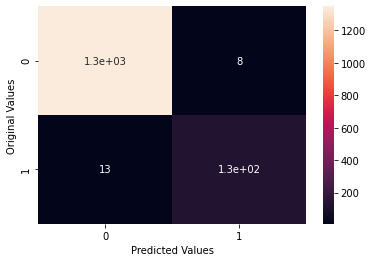

In [ ]:
#Confusion Matrix
cm = confusion_matrix(test_Y,Y_pred_GB)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

In [ ]:
#Precision Score
Pr_sc_GB = precision_score(test_Y,Y_pred_GB)
Pr_sc_GB

0.9424460431654677

In [ ]:
#Recall Score
Rs_GB = recall_score(test_Y,Y_pred_GB)
Rs_GB

0.9097222222222222

In [ ]:
#F1 score
F1_GB = f1_score(test_Y,Y_pred_GB)
F1_GB

0.9257950530035336

In [ ]:
#ROC Area under the score
R_Ar_GB = roc_auc_score(test_Y,Y_pred_GB)
R_Ar_GB

0.9519112586037366

*It is also working well.*

***B. Ada Boost Classifier Model***

*It is model based on ensembling technique. For Better understanding, kindly visit: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html*

*I tried various values of n_estimators and found 100 to be best suited to our model.*

In [ ]:
#Buidling the model
from sklearn.ensemble import AdaBoostClassifier
Ada = AdaBoostClassifier(random_state=0,n_estimators=100)

In [ ]:
#Fitting the model with training set
Ada.fit(train_X,train_Y['Personal Loan'])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [ ]:
#Predicting the results with test set
Y_pred_Ada=Ada.predict(test_X)

In [ ]:
#Accuracy of Test set
acc_Ada = accuracy_score(test_Y,Y_pred_Ada)
acc_Ada

0.974

In [ ]:
#Accuracy of training set
Y_pred_Ada_train = Ada.predict(train_X)
acc_Ada_train = accuracy_score(train_Y,Y_pred_Ada_train)
acc_Ada_train

0.9771428571428571

It is working fine.

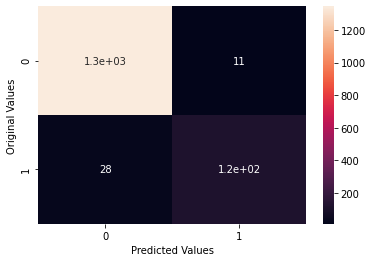

In [ ]:
#Confusion Matrix
cm =confusion_matrix(test_Y,Y_pred_Ada)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

*It may be working well but it doesn't suit our case as it has 31 False negatives*

In [ ]:
#Precision Score
Pr_sc_Ada = precision_score(test_Y,Y_pred_Ada)
Pr_sc_Ada

0.9133858267716536

In [ ]:
#Recall Score
Rs_Ada = recall_score(test_Y,Y_pred_Ada)
Rs_Ada

0.8055555555555556

In [ ]:
#F1 score
F1_Ada = f1_score(test_Y,Y_pred_Ada)
F1_Ada

0.8560885608856089

In [ ]:
#ROC Area under the curve score
R_Ar_Ada = roc_auc_score(test_Y,Y_pred_Ada)
R_Ar_Ada

0.8987217305801376

***C. Bagging Ensemble Classifier Model***

*It is based on bagging ensembling technique which increases reliability of predictions. For further understanding, kindly visit: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html* 

In [ ]:
#Building the model
from sklearn.ensemble import BaggingClassifier
Bag = BaggingClassifier(random_state=0)

In [ ]:
#Fitting the model with training set
Bag.fit(train_X,train_Y['Personal Loan'])

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=0, verbose=0,
                  warm_start=False)

In [ ]:
#Predicting results with test set
Y_pred_Bag=Bag.predict(test_X)

In [ ]:
#Accuracy score of test set
acc_Bag = accuracy_score(test_Y,Y_pred_Bag)
acc_Bag

0.9826666666666667

In [ ]:
#Accuracy score of training set
Y_pred_Bag_train = Bag.predict(train_X)
acc_Bag_train = accuracy_score(train_Y,Y_pred_Bag_train)
acc_Bag_train

0.9985714285714286

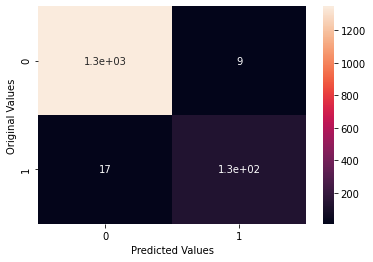

In [ ]:
#Confusion Matrix
cm = confusion_matrix(test_Y,Y_pred_Bag)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

In [ ]:
#Precision Score
Pr_sc_Bag = precision_score(test_Y,Y_pred_Bag)
Pr_sc_Bag

0.9338235294117647

In [ ]:
#Recall Score
Rs_Bag = recall_score(test_Y,Y_pred_Bag)
Rs_Bag

0.8819444444444444

In [ ]:
#F1 Score
F1_Bag = f1_score(test_Y,Y_pred_Bag)
F1_Bag

0.9071428571428571

In [ ]:
#ROC Area under the curve score
R_Ar_Bag = roc_auc_score(test_Y,Y_pred_Bag)
R_Ar_Bag

0.9376536381514258

***D. Support Vector Machine Classifier Model***

*They are supervised learning models which are used to predict results. For further understanding, kindly visit: https://scikit-learn.org/stable/modules/svm.html*

In [ ]:
#Building the model
from sklearn.svm import SVC
SVM = SVC(random_state=0,gamma='auto')

In [ ]:
#Fitting the model with Training set
SVM.fit(train_X,train_Y['Personal Loan'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
#Predicting the results with Test set
Y_pred_SVM=SVM.predict(test_X)

In [ ]:
#Accuracy Score of test set
acc_SVM = accuracy_score(test_Y,Y_pred_SVM)
acc_SVM

0.9786666666666667

In [ ]:
#Accuracy Score of training set
Y_pred_SVM_train = SVM.predict(train_X)
acc_SVM_train = accuracy_score(train_Y,Y_pred_SVM_train)
acc_SVM_train

0.98

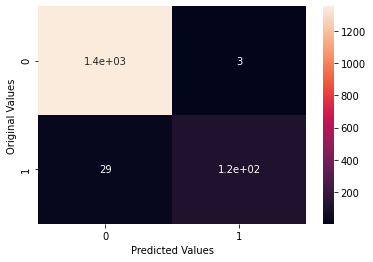

In [ ]:
#Confusion Matrix
cm = confusion_matrix(test_Y, Y_pred_SVM)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

In [ ]:
#Precision Score
Pr_sc_SVM = precision_score(test_Y,Y_pred_SVM)
Pr_sc_SVM

0.9745762711864406

In [ ]:
#Recall Score
Rs_SVM=recall_score(test_Y,Y_pred_SVM)
Rs_SVM

0.7986111111111112

In [ ]:
#F1 Score
F1_SVM=f1_score(test_Y,Y_pred_SVM)
F1_SVM

0.8778625954198473

In [ ]:
#ROC Area under the curve Score
R_Ar_SVM=roc_auc_score(test_Y,Y_pred_SVM)
R_Ar_SVM

0.8981993608652902

***E. Neural Networks Classifier - MLP Classifier***

*It is a classifier which is a step towards AI. In this we will be using Multi - Linear Perceptron(MLP) Classifier. For more understanding, kindly visit: https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier*

In [ ]:
#Building the model
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(random_state=0,max_iter=300)

In [ ]:
#Fitting the Model with training set
MLP.fit(train_X,train_Y['Personal Loan'])

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=300,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=0, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
#Predicting the results with test set
Y_pred_MLP=MLP.predict(test_X)

In [ ]:
#Accuracy of test set
acc_MLP = accuracy_score(test_Y,Y_pred_MLP)
acc_MLP

0.9813333333333333

In [ ]:
#Accuracy of training set
Y_pred_MLP_train = MLP.predict(train_X)
acc_MLP_train = accuracy_score(train_Y,Y_pred_MLP_train)
acc_MLP_train

0.9951428571428571

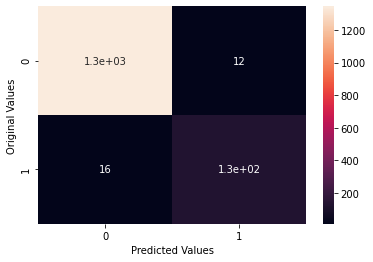

In [ ]:
#Confusion Matrix
cm = confusion_matrix(test_Y,Y_pred_MLP)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

In [ ]:
#Precision Score
Pr_sc_MLP = precision_score(test_Y,Y_pred_MLP)
Pr_sc_MLP

0.9142857142857143

In [ ]:
#Recall Score
Rs_MLP = recall_score(test_Y, Y_pred_MLP)
Rs_MLP

0.8888888888888888

In [ ]:
#F1 Score
F1_MLP = f1_score(test_Y,Y_pred_MLP)
F1_MLP

0.9014084507042254

In [ ]:
#ROC Area under the curve score
R_Ar_MLP = roc_auc_score(test_Y,Y_pred_MLP)
R_Ar_MLP

0.9400196656833825

***F. K-Nearest Neighbour Classifier Model***

*KNN Classifier works on the basis of nearest distance and nearest neighbours and hence classifying the data into subgroups which results in predictions. For further understanding, kindly visit: https://scikit-learn.org/stable/modules/neighbors.html I tried various values of K i.e., n_neighbors and found 5 to be the most suitable in this case.*

In [ ]:
#Building the model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)

In [ ]:
#Fitting the model with training set
KNN.fit(train_X,train_Y['Personal Loan'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
#Making predictions with test set
Y_pred_KNN=KNN.predict(test_X)

In [ ]:
#Accuracy of test set
acc_KNN = accuracy_score(test_Y,Y_pred_KNN)
acc_KNN

0.9613333333333334

In [ ]:
#Accuracy of training set
Y_pred_KNN_train = KNN.predict(train_X)
acc_KNN_train = accuracy_score(train_Y,Y_pred_KNN_train)
acc_KNN_train

0.9668571428571429

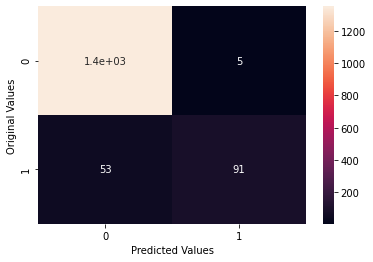

In [ ]:
#Confusion Matrix
cm = confusion_matrix(test_Y,Y_pred_KNN)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

In [ ]:
#Precision Score
Pr_sc_KNN = precision_score(test_Y, Y_pred_KNN)
Pr_sc_KNN

0.9479166666666666

In [ ]:
#Recall Score
Rs_KNN = recall_score(test_Y,Y_pred_KNN)
Rs_KNN

0.6319444444444444

In [ ]:
#F1 Score
F1_KNN = f1_score(test_Y,Y_pred_KNN)
F1_KNN

0.7583333333333333

In [ ]:
R_Ar_KNN = roc_auc_score(test_Y,Y_pred_KNN)
R_Ar_KNN

0.814128564405113

***G. Decision Tree Classifier Model***

*Decision Tree classifier is a model in which it takes decision on basis of certain criterias. For further understanding, kindly visit: https://scikit-learn.org/stable/modules/tree.html For setting the maximum depth upto which the model must go, I tested with various values and found 7 to be the best*

In [ ]:
#Building the model
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(random_state=0, max_depth=7)

In [ ]:
#Fitting the training set into the model
DTC.fit(train_X,train_Y['Personal Loan'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

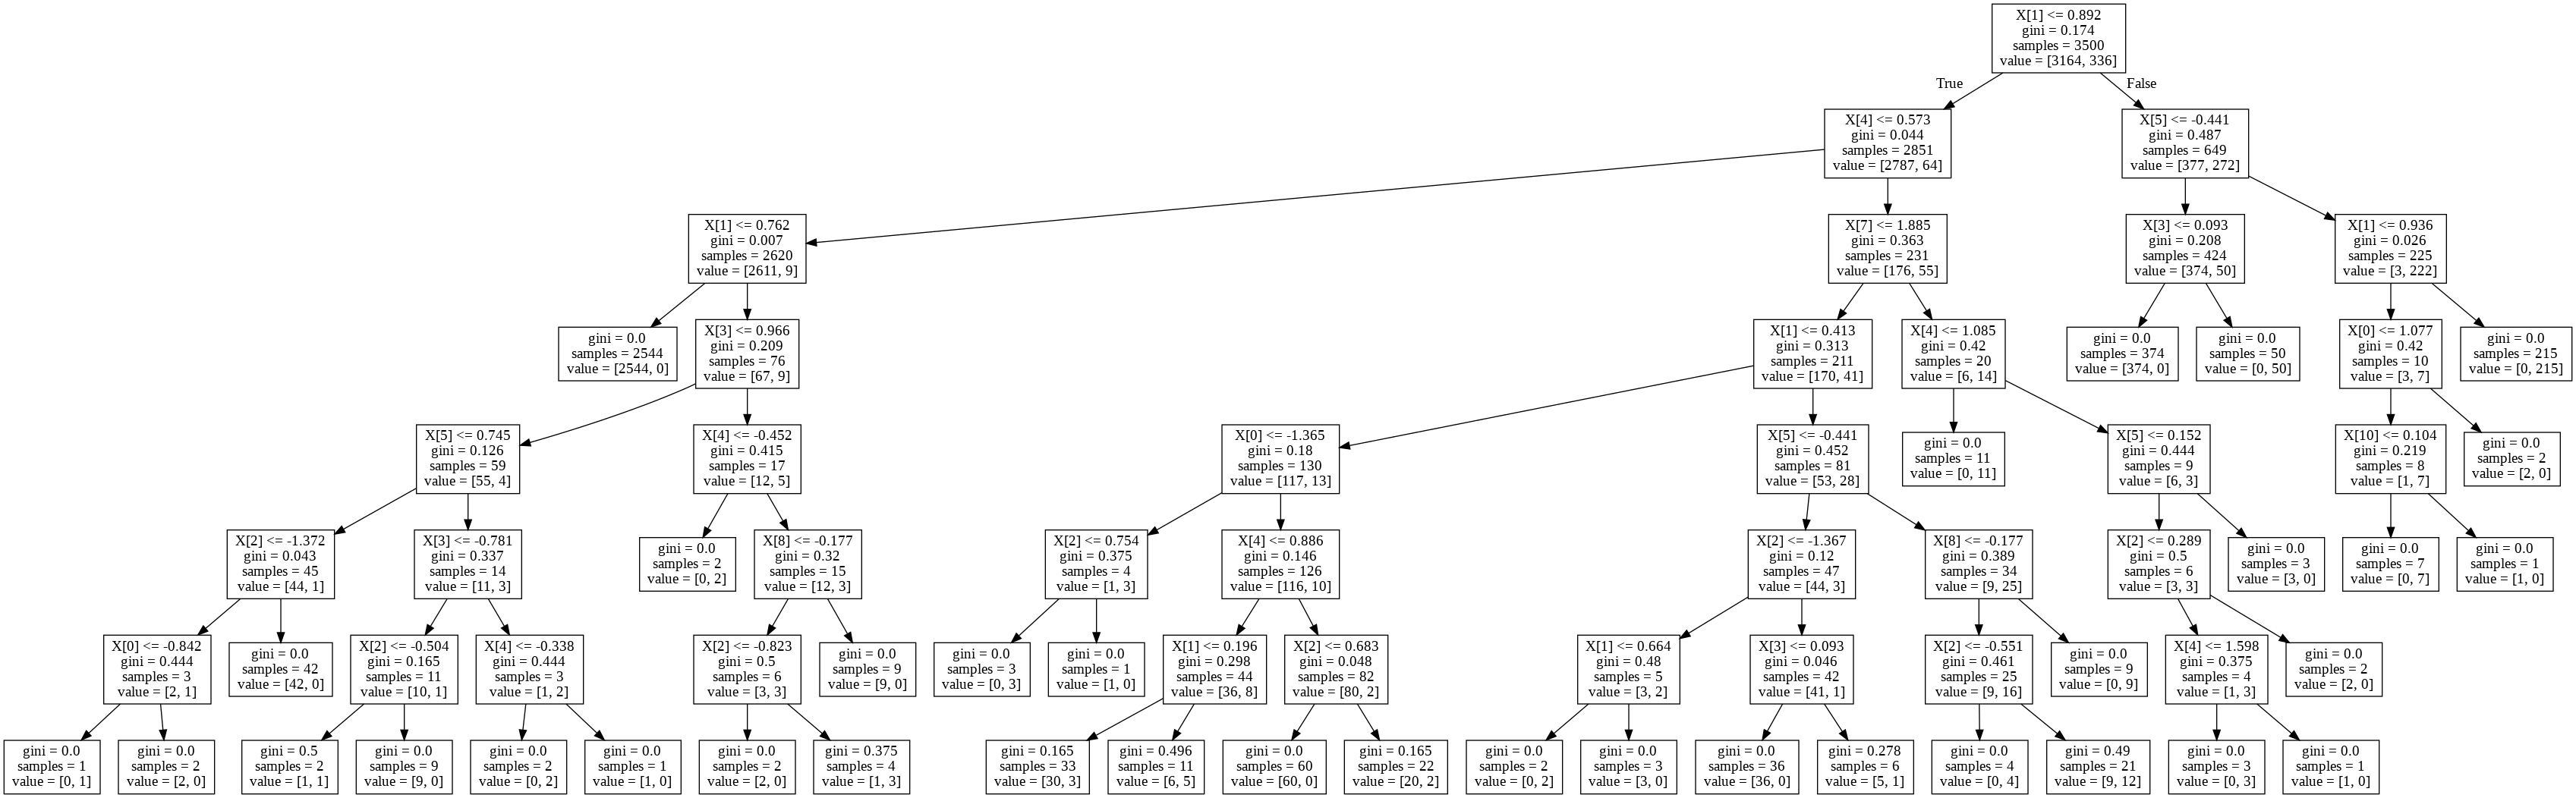

In [ ]:
#Dotting the Graph
from sklearn import tree
dot_data=tree.export_graphviz(DTC,out_file=None)

#Drawing the graph
import pydotplus as pdp
from IPython.display import Image
graph = pdp.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
#Predicting the results with test set
Y_pred_DTC=DTC.predict(test_X)

In [ ]:
#Accuracy score of test set
acc_DTC = accuracy_score(test_Y,Y_pred_DTC)
acc_DTC

0.9813333333333333

In [ ]:
#Accuracy score of training set
y_pred_DTC_train = DTC.predict(train_X)
acc_DTC_train = accuracy_score(train_Y,y_pred_DTC_train)
acc_DTC_train

0.9937142857142857

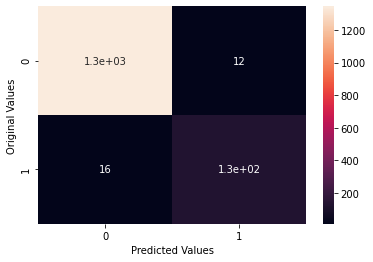

In [ ]:
#Confusion Matrix
cm =confusion_matrix(test_Y,Y_pred_DTC)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

In [ ]:
#Precision Score
Pr_sc_DTC = precision_score(test_Y,Y_pred_DTC)
Pr_sc_DTC

0.9142857142857143

In [ ]:
#Recall Score
Rs_DTC = recall_score(test_Y,Y_pred_DTC)
Rs_DTC

0.8888888888888888

In [ ]:
#F1 Score
F1_DTC = f1_score(test_Y,Y_pred_DTC)
F1_DTC

0.9014084507042254

In [ ]:
#ROC Area under the curve score
R_Ar_DTC = roc_auc_score(test_Y,Y_pred_DTC)
R_Ar_DTC

0.9400196656833825

***H. Gaussian Naive Bayes Model***

*Gaussian Naive Bayes is a good method of classification. For more details, kindly have a look at: https://scikit-learn.org/stable/modules/naive_bayes.html*

In [ ]:
#Building the model
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()

In [ ]:
#Fitting training set to the model
GNB.fit(train_X,train_Y['Personal Loan'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
#Predicting results with test set
Y_pred_GNB = GNB.predict(test_X)

In [ ]:
#Accuracy score of test set
acc_GNB = accuracy_score(test_Y,Y_pred_GNB)
acc_GNB

0.8866666666666667

In [ ]:
#Accuracy score of training set
Y_pred_GNB_train = GNB.predict(train_X)
acc_GNB_train = accuracy_score(train_Y, Y_pred_GNB_train)
acc_GNB_train

0.88

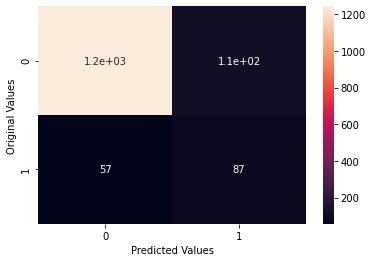

In [ ]:
#Confusion Matrix
cm = confusion_matrix(test_Y,Y_pred_GNB)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

In [ ]:
#Precision Score
Pr_sc_GNB = precision_score(test_Y,Y_pred_GNB)
Pr_sc_GNB

0.435

In [ ]:
#Recall Score
Rs_GNB = recall_score(test_Y, Y_pred_GNB)
Rs_GNB

0.6041666666666666

In [ ]:
#F1 Score
F1_GNB = f1_score(test_Y,Y_pred_GNB)
F1_GNB

0.5058139534883721

In [ ]:
#ROC Area under the curve score
R_Ar_GNB = roc_auc_score(test_Y,Y_pred_GNB)
R_Ar_GNB

0.7604166666666666

***I. Perceptron Model***

*It is a very basic model based on linear method which is also used to classify results. To understand better, kindly have a look at: https://en.wikipedia.org/wiki/Perceptron*

In [ ]:
#Building model
from sklearn.linear_model import Perceptron
perce = Perceptron(random_state=0)

In [ ]:
#Fitting the model with training set
perce.fit(train_X,train_Y['Personal Loan'])

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#Predicting the model with test set
Y_pred_P = perce.predict(test_X)

In [ ]:
#Accuracy score of test set
acc_P = accuracy_score(test_Y,Y_pred_P)
acc_P

0.9113333333333333

In [ ]:
#Accuracy of training set
Y_pred_P_train = perce.predict(train_X)
acc_P_train = accuracy_score(train_Y,Y_pred_P_train)
acc_P_train

0.9174285714285715

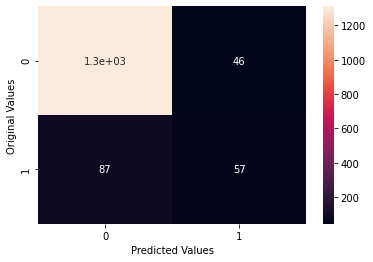

In [ ]:
#Confusion Matrix
cm = confusion_matrix(test_Y,Y_pred_P)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

In [ ]:
#Precision score
Pr_sc_P = precision_score(test_Y,Y_pred_P)
Pr_sc_P

0.5533980582524272

In [ ]:
#F1 score
F1_P = f1_score(test_Y,Y_pred_P)
F1_P

0.46153846153846156

In [ ]:
#Recall score
Rs_P = recall_score(test_Y,Y_pred_P)
Rs_P

0.3958333333333333

In [ ]:
#ROC area under the curve score
R_Ar_P = roc_auc_score(test_Y,Y_pred_P)
R_Ar_P

0.6809550147492625

*So, it does not seem a relaible method in our case. So, it would be better to use other model over perceptron in this case.*

***J. Random Forest Classifier***

*It is an ensembling technique based model which creates logics based on a number of models and hence, the predictions are more reliable. For further understanding, kindly visit: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html*

*On comparing various values of max_depth and n_estimators, I have found n_estimators to be 350 and max_depth as 7 to be best suited in this case.*

In [ ]:
#Building the model
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(random_state=0,max_depth=7,n_estimators=350)

In [ ]:
#Fitting the model with training set
RFC.fit(train_X,train_Y['Personal Loan'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=350,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
#Predicting the results with test set
Y_pred_RFC=RFC.predict(test_X)

In [ ]:
#Accuracy score of test set
acc_RFC = accuracy_score(test_Y,Y_pred_RFC)
acc_RFC

0.9873333333333333

In [ ]:
#Accuracy score of training set
Y_pred_RFC_train = RFC.predict(train_X)
acc_RFC_train = accuracy_score(train_Y, Y_pred_RFC_train)
acc_RFC_train

0.9934285714285714

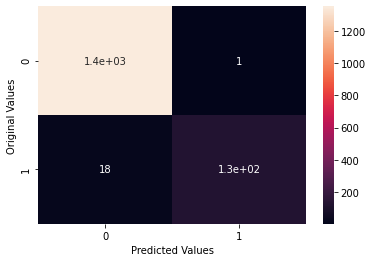

In [ ]:
#Confusion Matrix
cm = confusion_matrix(test_Y, Y_pred_RFC)
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Original Values')
plt.show()

In [ ]:
#Precision Score
Pr_sc_RFC = precision_score(test_Y,Y_pred_RFC)
Pr_sc_RFC

0.9921259842519685

In [ ]:
#Recall score
Rs_RFC = recall_score(test_Y, Y_pred_RFC)
Rs_RFC

0.875

In [ ]:
#F1 Score
F1_RFC = f1_score(test_Y,Y_pred_RFC)
F1_RFC

0.929889298892989

In [ ]:
#ROC Area under the curve score
R_Ar_RFC = roc_auc_score(test_Y,Y_pred_RFC)
R_Ar_RFC

0.9371312684365782

*So far, it seems to be the best method based on all the values.*

***Comparing the Models***

*Now that we have seen and built various models, let us compare the models and choose the best one for our case*.

*(i) Accuracies of Test sets of Models*

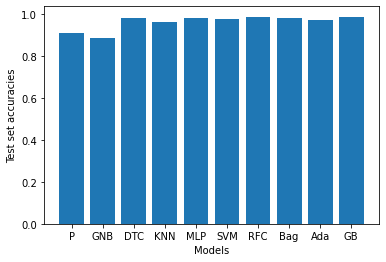

In [ ]:
#Plotting Bar Graph
labels=['P','GNB','DTC','KNN','MLP','SVM','RFC','Bag','Ada','GB']
Acc_Test=[acc_P,acc_GNB,acc_DTC,acc_KNN,acc_MLP,acc_SVM,acc_RFC,acc_Bag,acc_Ada,acc_GB]
plt.bar(labels,Acc_Test)
plt.xlabel('Models')
plt.ylabel('Test set accuracies')
plt.show()

***(ii) Accuracies of Training sets of Models***

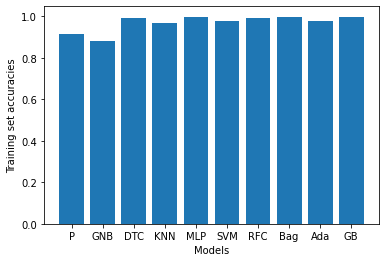

In [ ]:
#Plotting Bar Graph
Acc_Train=[acc_P_train,acc_GNB_train,acc_DTC_train,acc_KNN_train,acc_MLP_train,acc_SVM_train,acc_RFC_train,acc_Bag_train,acc_Ada_train,acc_GB_train]
plt.bar(labels,Acc_Train)
plt.xlabel('Models')
plt.ylabel('Training set accuracies')
plt.show()

*(iii) Precision scores of models*

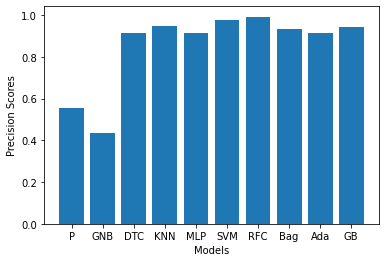

In [ ]:
#Plotting Bar Graph
PS=[Pr_sc_P,Pr_sc_GNB,Pr_sc_DTC,Pr_sc_KNN,Pr_sc_MLP,Pr_sc_SVM,Pr_sc_RFC,Pr_sc_Bag,Pr_sc_Ada,Pr_sc_GB]
plt.bar(labels,PS)
plt.xlabel('Models')
plt.ylabel('Precision Scores')
plt.show()

*(iv) Recall Scores of Models*

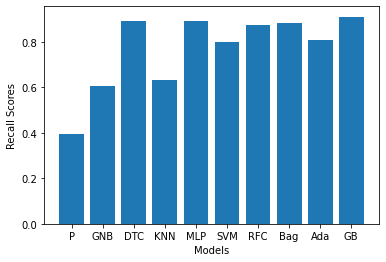

In [ ]:
#Plotting Bar Graph
RS=[Rs_P,Rs_GNB,Rs_DTC,Rs_KNN,Rs_MLP,Rs_SVM,Rs_RFC,Rs_Bag,Rs_Ada,Rs_GB]
plt.bar(labels,RS)
plt.xlabel('Models')
plt.ylabel('Recall Scores')
plt.show()

*(v) F1 scores of models*

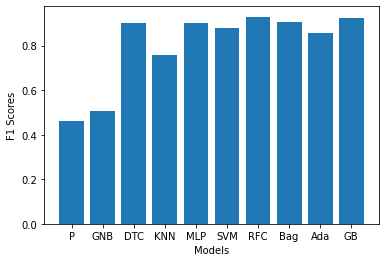

In [ ]:
#Plotting Bar Graph
F1S=[F1_P,F1_GNB,F1_DTC,F1_KNN,F1_MLP,F1_SVM,F1_RFC,F1_Bag,F1_Ada,F1_GB]
plt.bar(labels,F1S)
plt.xlabel('Models')
plt.ylabel('F1 Scores')
plt.show()

*(vi) ROC Area under curve score model*

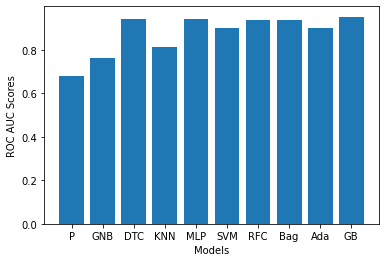

In [ ]:
#Plotting Bar Graph
ROC=[R_Ar_P,R_Ar_GNB,R_Ar_DTC,R_Ar_KNN,R_Ar_MLP,R_Ar_SVM,R_Ar_RFC,R_Ar_Bag,R_Ar_Ada,R_Ar_GB]
plt.bar(labels,ROC)
plt.xlabel('Models')
plt.ylabel('ROC AUC Scores')
plt.show()

*So, on the basis of the above comparisions, we can conclude that Random Forest Classifier is working the best for our case and hence, we should use it for the purpose of prediction.*

# ***9. Business Understanding Of Model***

From this very interesting project and the analysis, we can conclude the following points:

The aim of the bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the data.

The Dataset provided to us had no null values.

*   It had the data of 5000 customers.
*   ID's of customers had nothing to do with the loan.
*   The Experience and Age columns were highly correlated.
*   The Experience Column had faulty data i.e., it had negative values.
*   Maximum number of customers live alone.
*   Maximum number of customers are graduates.
*   9.6% of customers took loan in the last session.
*   10.44% customers have security accounts with the bank.
*   6.04% customers have Certificate of Deposit Accounts with the bank.
*   59.68% customers use Online Facilities.
*   29.4% customers have credit cards issued by Universal Bank.
*   Number of customers decrease as Income increases.
*   Many cutomers have low average credit card spending per month.
*   People with High education and High Income tend to take loan more.
*   People with security accounts tend to take loan less.
*   Mortgage, Income and Credit card average data is skewed highly.
*   Zipcodes had too many nominal data so it will not effect much to the prediction.
*   All the models seem to work well but we were required to choose model best suitable for our case, so we compared them and on comparision, found Random Forest Ensembling Classifier to be the best suited for our case. And its results seem highly promising.









.






***Sources***


*   *Internship Studio*
*   *www.google.com*
*   *www.scikit-learn.org*
*   *Wikipedia* 

*Thanking You,*

*Manikant Sangam* 



